<a href="https://colab.research.google.com/github/user10068/ChatGPT-Next-Web/blob/main/gradientdesent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#gradient descent 梯度下降，根据斜率改编参数
import pandas as pd 
url = "https://raw.githubusercontent.com/GrandmaCan/ML/main/Resgression/Salary_Data.csv" 
data = pd.read_csv(url)
data
#用数学方式表示    薪资和年资的关系   y = w*x + b y = salaty  x = YearsExperience 
x = data['YearsExperience']    # 年资
y = data['Salary']

In [5]:
def compute_gradient(x,y,w,b):
  # w = 10
  # b = 10 
  w_gradient = (x*(w*x+b - y)).mean()       #w_gradient = (2*x*(w*x+b - y)).sum()/ n  mean()求和后再平均 
  b_gradient =((w*x+b - y)).mean()       #b_gradient = (2*(w*x+b -y)).sum() /n 求和后再平均
  return w_gradient,b_gradient 


In [ ]:
#compute_gradient(x,y,20,10)

In [6]:
def compute_cost(x,y,w,b):
  y_pred = w * x + b 
  cost = (y - y_pred)**2
  cost = cost.sum() / len (x)
  return cost

In [7]:
#w和 b的更新

def gradient_desent(x,y,w_init,b_init,learning_rate,cost_founction,gradient_founction,run_iter,p_iter = 1000):
  c_hist = []
  b_hist = []
  w_hist = []
  w = w_init
  b = b_init
  for i in range(run_iter):
    w_gradient,b_gradient = compute_gradient(x,y,w,b)

    w = w - w_gradient*learning_rate   #w - 更新率*学习率 赋给w
    b = b - b_gradient*learning_rate   #b - 更新率*学习率 赋给 b 
    cost = compute_cost(x,y,w,b)
    w_hist.append(w)
    b_hist.append(b)
    c_hist.append(cost)
    if i%p_iter == 0 :
      print(f"Ieration {i:5}: Cost {cost: .4e}, W: {w: .2e}, B: {b: .2e}, W_gradient: {w_gradient: .2e}, B_gradient: {b_gradient: .2e}")
  return w , b, w_hist, b_hist, c_hist


In [ ]:
w_init = 0 
b_init = 0
learning_rate = 1.0e-3
run_iter = 20000
w_final,b_final,w_hist,b_hist,c_hist = gradient_desent(x,y,w_init,b_init,learning_rate,compute_cost,compute_gradient,run_iter)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.arange(0,100),c_hist[:100])
plt.title = ("iteration vs cost")
plt.xlabel = ("iteration")
plt.ylabel = ("cost")
plt.show()

In [10]:
#print(f"最终w ={w_final:.2f}, b = {b_final:.2f}")

最终w =9.14, b = 27.89


In [11]:
#print(f"年资是3.5年，预测薪资是 {w_final*3.5 + b_final:.2f}k")

年资是3.5年，预测薪资是 59.88k


In [ ]:
import numpy as np
ws = np.arange(-100,101)
bs = np.arange(-100,101)
costs = np.zeros((201,201))
i = 0 
for w in ws:
  j = 0
  for b in bs:
    cost = compute_cost(x,y,w,b)
    costs[i,j] = cost
    j += 1
  i += 1

costs

In [ ]:
!pip install wget
import wget
wget.download("https://github.com/GrandmaCan/ML/raw/main/Resgression/ChineseFont.ttf")

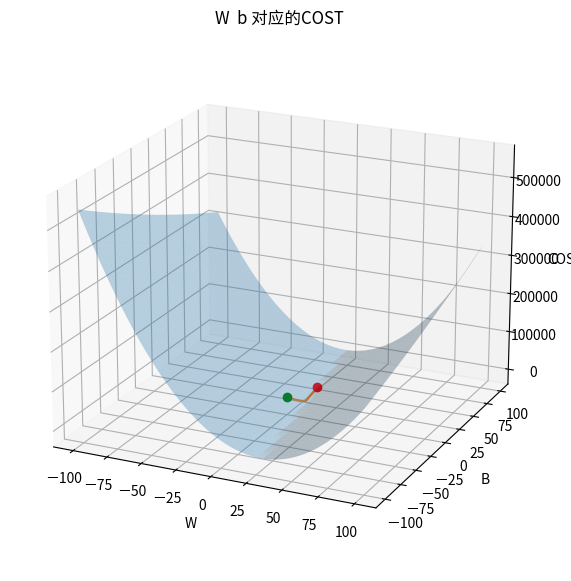

In [18]:
import matplotlib as mlp 
from matplotlib.font_manager  import fontManager
fontManager.addfont("ChineseFont.ttf")
mlp.rc("font",family="ChineseFont")
plt.figure(figsize=(7,7))
ax = plt.axes(projection="3d")
ax.view_init(20,-65)  #旋转角度，上下和 左右，直接输入度数 
ax.xaxis.set_pane_color = (0,0,0)
ax.yaxis.set_pane_color = (0,0,0)
ax.zaxis.set_pane_color = (0,0,0)
b_grid, w_grid = np.meshgrid(bs, ws)
ax.plot_surface(w_grid, b_grid,costs,alpha = 0.3)
#ax.plot_wireframe(w_grid,b_grid,costs,color="black",alpha = 0.1)
ax.set_title("W  b 对应的COST")
ax.set_xlabel("W")
ax.set_ylabel("B")
ax.set_zlabel('COST')

w_index,b_index = np.where(costs == np.min(costs))
ax.scatter(ws[w_index] ,bs[b_index], costs[w_index,b_index],color="red",s=36)
ax.scatter(w_hist[0],b_hist[0],c_hist[0],color = "green",s = 36)
ax.plot(w_hist,b_hist,c_hist)

plt.show()